## 9-1. 들어가며

최근 공유차량, 렌터카를 빌려 고의로 사고를 내고 보험금을 챙기는 사건이 점점 늘어나고 있습니다. 인터넷에 `카셰어링 보험사기`, `렌터카 보험사기`를 키워드로 검색하면 관련 보도 기사가 쏟아지는 것을 확인할 수 있습니다.

[공유차량 이용해 일부러 '쿵'…보험사기 전국적으로 확산](https://news.sbs.co.kr/news/endPage.do?news_id=N1005795919&plink=COPYPASTE&cooper=SBSNEWSEND)

현재 쏘카의 경우 카셰어링 된 자동차 사고율은 건수 대비 1%이고, 그 중 단독 사고가 절반 이상을 차지하기 때문에 보험 사기 건 수 기준의 피해는 크지 않다고 볼 수 있습니다(2021년 8월 기준).

그러나 보험 사기로 인한 피해액은 일반 사고(단독 사고 포함)에 비해 5~6배에 달합니다.

보험 사기는 점점 증가하는 추세를 보이며 사건 발생 시 피해액이 크고, 사회적인 범죄이기 때문에 쏘카에서 주요하게 다루는 문제입니다.

자동차 보험 사기는 집단적, 반복적 발생 특성을 가지고 있으며 사기 건 수가 증가하고 있으나 전체 사고 건 대비 아주 적은 비율이라는 점, 아직 밝혀지지 않은 보험 사기가 존재한다는 점의 특징을 가지고 있습니다.

쏘카는 이러한 보험 사기의 특성을 반영하여 **GPS 데이터, 메모 데이터를 수집하고 네트워크 분석(network analysis) 방법을 활용하여 보험 사기를 적발**하기 위한 노력을 기울이고 있습니다.

지금부터 우리는 쏘카가 직면한 자동차 보험 사기 문제에 대해 자세히 공유하고, 해결하는 과정을 학습 하겠습니다.

## 학습목표

___

-   GPS 데이터, 메모 데이터 전처리 방법을 학습한다.
-   네트워크 분석(Network Analysis) 방법을 이해한다.
-   네트워크 분석 방법을 보험 사기 사례에 적용하여 의미를 도출한다.

## 준비물

___

폴더를 생성하고 아래 명령어를 입력하여 데이터를 다운로드해 주세요.

```
$ mkdir -p ~/aiffel/insurance_fraud/data
$ ln -s ~/data/* ~/aiffel/insurance_fraud/data
$ pip install pydot
```

## 9-2 보험 사기의 문제 정의와 특징
### 1\. 보험사기 문제 정의

___

렌터카를 이용한 보험사기는 젊은 층 사이에서 유행처럼 번지고 있는 신종 범죄입니다. 쏘카는 약 15,000대 이상의 차량을 비대면으로 운영하기 때문에 자동화된 탐지 시스템이 필수적입니다.

아래와 같은 데이터를 이용하면 탐지 시스템을 고도화하는데 도움이 됩니다.

-   GPS 정보 : 차량에 달린 센서를 통해 얻어냄, 난폭/이상 운행패턴을 감지가능
-   메모 데이터 : 사고 처리과정에서 콜 센터의 도움을 받아 진행하게 되는데 이 과정에서 남는 사고 경위, 상황에 대한 데이터

#### Fraud Detection System(FDS)는 무엇인가?

어떤 서비스에서 부정한 이용을 저지르는 소수의 사람들을 탐지하는 것을 FDS라고 부릅니다. anomaly detection도 이와 비슷한 개념입니다.

이러한 Fraud 문제는 신용카드회사나 광고회사, 쏘카와 같은 차량 렌탈업체에서 자주 발생합니다. 예를 들어 1. 자동차 보험금을 노리는 사기 2. 신용카드 대출 관련 사기 3. 광고비 집행 단가를 올리기 위한 매크로 사기 등이 있습니다.

이런 문제들을 해결하기 위해서 여러가지 방법들이 존재하지만, 이번 노드에서는 FDS를 다루기 위한 도구들을 공부하고, 다음 프로젝트노드에서는 지도학습과 비지도학습을 이용하여 FDS를 구축해 보도록 하겠습니다.

### 2\. 보험사기 문제 특징1

___

쏘카 이용자에게 일어나는 사고의 종류는 다양합니다. 자차를 단독으로 사고가 날 수도 있고 개인이나 대물 사고가 일어 날 수도 있습니다. 전체 자차/개인/대물 사고 중 보험사기건수의 비율이 그렇게 높지 않기 때문에 모델링을 하기가 쉽지 않습니다. 또한 보험사기라고 아직 명확히 밝혀지지 않은 경우의 데이터가 있기 때문에 문제가 됩니다.

정리하면 아래와 FDS를 위한 데이터셋은 아래와 같은 특성을 가진다고 할 수 있습니다.

**1.Imbalanced(불균형)**

-   특정 데이터셋이 한 레이블에 너무 치우쳐있어 데이터가 불균형한 경우
-   95%의 일반사고, 5%의 보험사기 사고

**2.Unlabeled(레이블링이 되지 않음)**

-   일반사고인지 보험사기인지 명확하게 밝혀지지 않은 데이터

결제 산업에서는 FDS가 어떻게 쓰이는 아래 동영상을 보고 사례를 살펴볼까요?

<iframe width="560" height="315" src="https://www.youtube.com/embed/rHSpab1Wi9k" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen=""></iframe>

### 3\. 보험 사기 문제 특징2

___

**보험사기는 집단으로 반복적으로 일으키는 특성을 지니고 있습니다. 그렇기 때문에, 개인들간의 관계, 커뮤니티를 파악하는 것이 중요합니다.**

보험사기를 일으키는 사례들을 한 번 살펴보겠습니다.

2019년 기사에 따르면, 20대 A씨등 70여명은 교통이 혼잡한 곳을 골라 고의로 교통사고를 내고 보험금을 챙겼습니다. 차선을 변경하는 차량을 발견하고 뒤에서 다가와 추돌사고를 냈는데, 횟수로 79회 금액은 5억원에 달합니다.

다른 사례를 살펴보면, 온라인 커뮤니티와 SNS등을 통해 10 ~ 20대 젊은 층을 대상으로 보험사기동참을 권유하는 사례가 잇따르고 있다고 합니다. 일명 'ㄷㅋ알바' 모집한다는 글을 커뮤니티에서 버젓이 볼 수 있습니다. ㄷㅋ는 뒤쿵의 머릿글자로 뒤에서 차량을 고의로 충돌한다는 의미입니다. 인터넷 카페나 텔레그램등을 통해 '하루 일당 25만원+'등의 게시물을 이용해 보험사기단을 모집하고 있는 것을 볼 수 있습니다. 지난 해 보험사기 적발 인원은 9만 8826명, 적발금액은 8986억원이라고 하는데요. 이처럼 고의로 보험사기의 피해가 상당한 것으로 보입니다.

그렇다면, 보험 사기로 쏘카에서 받고 있는 피해 규모는 얼마나 될까요? 일반적으로 사고율은 1%이고, 그 중 단독사고가 절반 이상을 차지하기 때문에 건 수 기준의 피해는 크지 않다고 볼 수도 있습니다. 다만 통계적으로 보험 사기건은 일반 사고에 비해 피해액을 5~6배 가량 과장하기 때문에 피해액이 적지 않고, 사회적인 범죄이기 때문에 주요하게 다루고 있습니다.

**Fraud Detection in Real Time with Graphs**

<iframe width="560" height="315" src="https://www.youtube.com/embed/AeNufTq1W5I" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen=""></iframe>

## 9.3. 보험 사기 적발을 위한 툴 (1) 정규표현식
쏘카 곳곳에는 보험사기임을 추정할 수 있는 단서가 여기저기에 남아있습니다. 대표적으로 사건에 대한 정보가 담긴 메모, 그리고 이동에 대한 데이터가 있습니다. 데이터를 본격적으로 다루기에 앞서 해당 데이터를 다룰 수 있는 도구들이 필요한 데요. 그 도구들에 대해 살펴보겠습니다.

보험 사기를 예측하기 위한 도구들로 정규표현식, NetworkX, H3을 익혀야합니다. 쏘카에서 제공하는 메모 데이터에는 전화번호나, 파손 부위, 문자열 등 여러 데이터들이 포함됩니다. 정규표현식은 이 중 원하는 데이터를 추출하기 위해 패턴을 정의해서 원하는 데이터를 추출하는데 사용이 됩니다.

## 정규표현식이란?

___

-   파이썬을 다뤄보셨다면 문자열의 길이를 구하고, 붙이고, 추출하고, Tokenization 하는 등의 전처리를 경험해보셨을 것입니다.
-   정규표현식은 문자열의 좀 더 복잡한 패턴을 다루기 위한 도구입니다.
-   문단에서 이메일 주소, URL, HTML 등 특정 패턴을 지닌 문자열을 찾기 위해 쓰입니다.
-   파이썬은 기본적으로 정규식 연산을 위해 re라이브러리를 지원합니다.
    -   [https://docs.python.org/ko/3/library/re.html#module-re](https://docs.python.org/ko/3/library/re.html#module-re)
-   (참고) 문자열을 시각화할 수 있는 웹사이트도 존재하니 디버깅에 잘 활용하시길 바랍니다.
    -   [https://regexper.com/](https://regexper.com/)

### 정규표현식의 기본 패턴

___

기본 패턴은 아래와 같습니다.

-   \[\] : One of, 문자열 중 하나
-   \[-\] : 예를 들어 \[2-3c-e\]의미는 2에서 3, c에서 e까지 매칭이 되는지 여부
-   \[^\] : Not 의 의미
-   () : 문자그룹의 의미
-   | : Or, X|Y 이면, X 또는 Y를 뜻함
-   ? : 반복 횟수. 안나타 나거나 1번 나타나는 것
-   \+ : 한번 이상 나타남
-   \* : 0번 이상 나타남
-   x{n} : x 가 n번 반복됨
-   x{n,} : x가 n번 이상 반복
-   . : any character
-   ^ $ : 문장의 시작과 끝

정규표현식을 사용하기 위한 기본 문법은 위와 같고, 위의 패턴들을 응용하여 실습에 들어가볼까요?

정규표현식을 사용하기 위해서는 파이썬에서 제공하는 library인 `re`패키지를 사용합니다.


In [55]:
import re

숫자와 문자열이 섞여 있을 때, 숫자만 찾거나, 숫자가 아닌 패턴들을 정규표현식을 통해 찾아볼 수 있습니다. `findall()`은 정규식과 매치되는 모든 문자열을 리스트형식으로 리턴해줍니다.

In [56]:
# 숫자 찾기 
example = '2021 10 01 Monday'
print(re.findall('[0-9]', example))

# 숫자 아닌 것 찾기 '
print(re.findall('[^0-9]', example))

['2', '0', '2', '1', '1', '0', '0', '1']
[' ', ' ', ' ', 'M', 'o', 'n', 'd', 'a', 'y']


위의 결과에서 보면, example문장을 넣고 `[0-9]`패턴을 주게 되면, 0에서 9에 해당하는 숫자만 출력이 되고, 0부터 9에 해당하지 않은 Monday는 출력이 되지 않는 것을 볼 수 있습니다. 두 번째 예제는 `[^0-9]`패턴을 주게 되면, ^은 not의 의미로, 0에서 9가 아닌 띄어쓰기 포함 나머지 문자열들을 반환하게 됩니다.


In [57]:
# 이메일 주소 찾기 

example = '제 이메일은 modulabs@socar.kr 입니다. modulabs@gmail.com 에서 변경되었습니다.'
re.findall('[a-z]+@[a-z]+.[a-z]+', example)

['modulabs@socar.kr', 'modulabs@gmail.com']

정규표현식은 문자열들 사이에 내가 찾고자하는 이메일 주소가 있다면, 패턴들의 조합으로 이메일만 출력할 수 있습니다. `[a-z]+@[a-z]+.[a-z]+`에서 `[a-z]+`는 a부터 z사이 해당하는 알파벳을 한 번만 출력하는게 아니라 계속 출력한다는 뜻입니다. 위에 숫자 찾기 예제에서는 `+`가 없기 때문에 숫자 하나씩만 출력이 되었지만, 이번 예제에서는 `+`를 추가함으로써, 연속적으로 출력되는 것을 볼 수 있습니다. `@[a-z]+`는 @문자열을 포함한 a부터 z사이의 문자열을 반복해서 출력하는 것이고, 마지막 `.[a-z]+`는 .문자열 포함해 a에서 z사이를 반복해서 출력하게 됩니다.

문자열과 URL이 함께 있을 때, 정규표현식 패턴식을 이용해 URL만 뽑아낼 수 있습니다.

In [58]:
# URL 찾기 

example = 'https://www.google.com/ 에 쏘카를 검색하시면 https://www.socar.kr/ 이 상단에 노출됩니다.'
re.findall('https://[a-z]{3}.[a-z]+.[a-z]+/', example) #

['https://www.google.com/', 'https://www.socar.kr/']

여기서 위 예제들에서 보지 못한 패턴이 등장합니다. `[a-z]{3}`은 a부터 z사이 매칭되는 알파벳을 3번 반복해서 찾아달라는 뜻입니다. 만약 example문장에서 w 알파벳을 찾았다면 똑같은 w를 3번 반복해서 출력하라는 뜻이됩니다.

문자열과 이미지파일이 섞인 문장에서 정규표현식으로 이미지 파일만 추출할 수도 있습니다. 아래 예제에서는 `[(png)|(jpg)|(gif)]`패턴을 볼 수가 있습니다. 이 패턴은 png 혹은 jpg 혹은 gif 중에 하나라도 해당된다면 출력해라라는 뜻입니다.

In [59]:
# 파일 찾기 

example = '제 바탕화면 보시면 sonata01.png 파일과 avante02.jpg 파일 그리고 socar2021.gif 파일이 존재합니다.'
re.findall('[a-z0-9]+\.[(png)|(jpg)|(gif)]+', example) #[a-z0-9]++\.(jpg|png|gif)

['sonata01.png', 'avante02.jpg', 'socar2021.gif']

기본적인 정규표현식에 대해서 익혀보았습니다. 정규표현식은 이렇게 여러가지 문자열과 알파벳 숫자들이 섞여 있을 때, 패턴들을 찾아 내가 원하는 문자열만 추출할 수 있는 아주 강력한 툴입니다. 메모데이터를 사용하는 쏘카 데이터에서 필요한 정보들을 추출하기 위해 필수적이라고 할 수 있죠! 그 다음 step에서는 그래프로 연관성을 나타낼 수 있는 NetworkX 툴에 대해서 알아보겠습니다.

## 9.4 보험 사기 적발을 위한 툴 (2) NetworkX

개인 간의 관계 또는 커뮤니티 관계들을 그래프 구조로 나타내 분석하기 유용한 도구인 NetworkX을 소개합니다. 보험 사기를 집단으로 혹은 반복적으로 일으키는 커뮤니티를 파악하는데 유용한 도구입니다.

![content img](https://d3s0tskafalll9.cloudfront.net/media/images/networkx.max-800x600.png)

\[출처 : https://towardsdatascience.com/customizing-networkx-graphs-f80b4e69bedf\]

## NetworkX란?

NetworkX는 그래프 구조 자료형을 다루기 위한 파이썬 패키지입니다. networkX의 튜토리얼은 [https://networkx.org/](https://networkx.org/) 에서 확인 할 수 있습니다. 여기서 말하는 그래프(graph)란 `노드(node, vertex)`와 그 사이를 잇는 `간선(edge)`으로 이루어진 구조를 말합니다. 그래프를 사용한다면, 친구들과의 관계, 단백질 구조, 비행기 노선 등 다양한 현상들을 그래프 구조로 표현할 수 있습니다. 이번 스탭에서는 네트워크의 기본 구성요소인 노드와 엣지를 생성하고 조작하는 방법에 대해 알아봅시다.



### 완성 된 그래프 들여다보기

___

그래프에 포함 된 노드는 `nodes`속성으로 확인할 수 있고 엣지는 `edges`로 확인할 수 있습니다.

### 제거하기

___

노드를 제거할 때는 `remove_node`를 써서 제거를 하고, 여러 노드 제거할 때는 `remove_nodes_from`을 쓰고, 엣지를 제거할 때는 `remove_edge`를 써서 제거합니다.

### 노드와 엣지에 속성 부여하기

___

엣지에는 유저가 정한 속성을 부여할 수 있습니다.

유저가 정한 속성이 아닌 가중치(weight)을 부여할 수도 있습니다.

노드에도 속성을 부여할 수 있습니다.


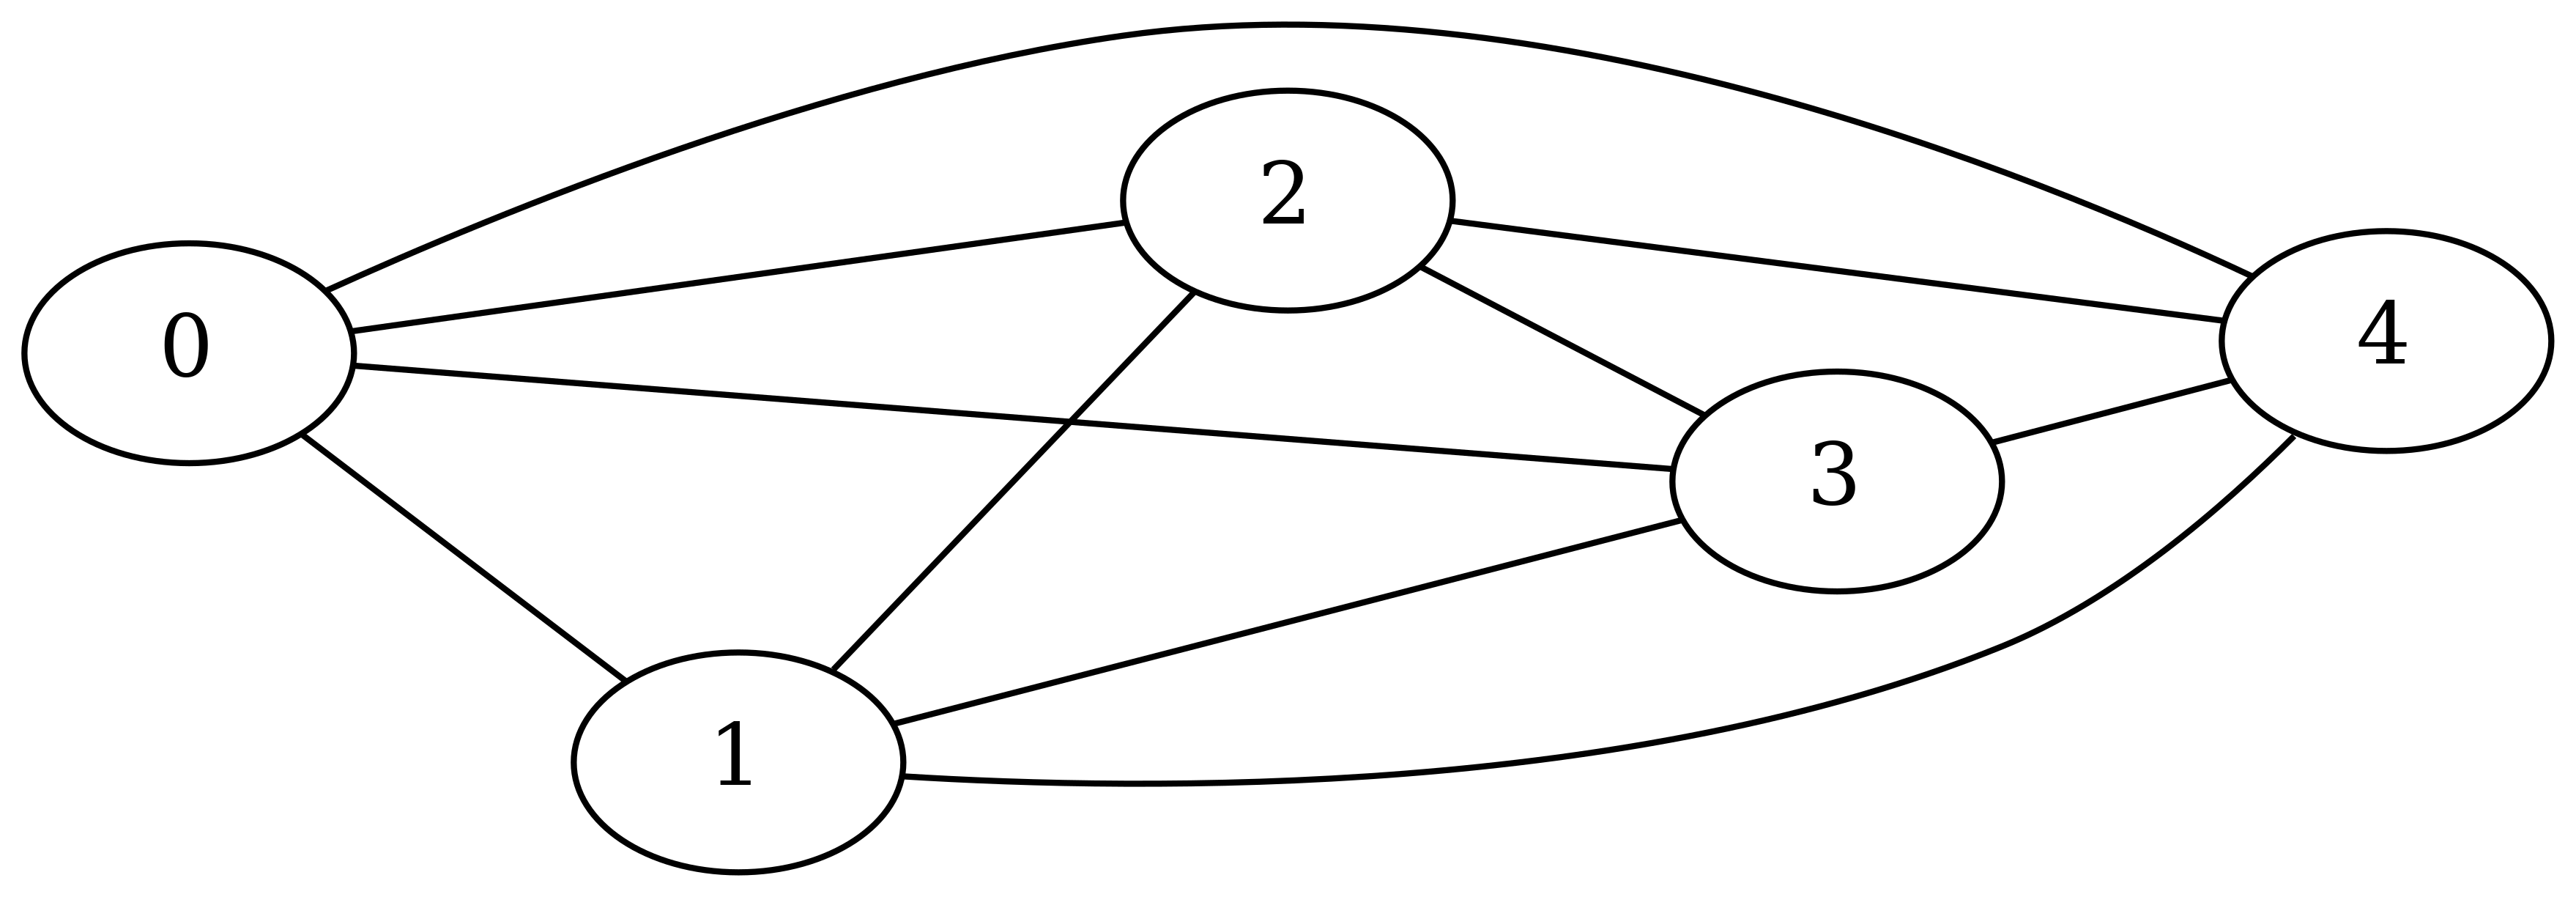

In [60]:
import networkx as nx
from IPython.core.display import Image
from networkx.drawing.nx_pydot import to_pydot

g = nx.complete_graph(5)
d = to_pydot(g)
d.set_dpi(600)
d.set_rankdir("LR")
Image(d.create_png(), width=400)

수학적으로 그래프 G는 노드(vertex) 집합 V와 간선(edge) 집합 E로 구성됩니다.

$$
G=(V,E)
$$

위에서 그린 그래프의 노드의 갯수는 총 5개이고, $<math xmlns="http://www.w3.org/1998/Math/MathML"><semantics><mrow><mi>V</mi><mo>=</mo><mo stretchy="false">(</mo><mn>0</mn><mo separator="true">,</mo><mn>1</mn><mo separator="true">,</mo><mn>2</mn><mo separator="true">,</mo><mn>3</mn><mo separator="true">,</mo><mn>4</mn><mo stretchy="false">)</mo></mrow><annotation encoding="application/x-tex">V =(0,1,2,3,4)</annotation></semantics></math>$가 이 그래프의 노드입니다. 그렇다면, 간선(edge)는 무엇일까요? 노드와 노드사이에 연결된 직선이 보이시나요? 그 것이 바로 간선입니다. 두 개의 노드으로 이루어진 순서가 있는 쌍입니다. 간선을 수학적인 집합으로 표현해본다면, $<math xmlns="http://www.w3.org/1998/Math/MathML"><semantics><mrow><mi>E</mi><mo>=</mo><mrow><mo stretchy="false">(</mo><mn>0</mn><mo separator="true">,</mo><mn>1</mn><mo stretchy="false">)</mo><mo separator="true">,</mo><mo stretchy="false">(</mo><mn>0</mn><mo separator="true">,</mo><mn>2</mn><mo stretchy="false">)</mo><mo separator="true">,</mo><mo stretchy="false">(</mo><mn>0</mn><mo separator="true">,</mo><mn>3</mn><mo stretchy="false">)</mo><mo separator="true">,</mo><mo stretchy="false">(</mo><mn>1</mn><mo separator="true">,</mo><mn>2</mn><mo stretchy="false">)</mo><mo separator="true">,</mo><mo stretchy="false">(</mo><mn>1</mn><mo separator="true">,</mo><mn>3</mn><mo stretchy="false">)</mo><mo separator="true">,</mo><mo stretchy="false">(</mo><mn>1</mn><mo separator="true">,</mo><mn>4</mn><mo stretchy="false">)</mo><mo separator="true">,</mo><mo stretchy="false">(</mo><mn>2</mn><mo separator="true">,</mo><mn>3</mn><mo stretchy="false">)</mo><mo separator="true">,</mo><mo stretchy="false">(</mo><mn>3</mn><mo separator="true">,</mo><mn>4</mn><mo stretchy="false">)</mo></mrow></mrow><annotation encoding="application/x-tex">E={(0,1),(0,2),(0,3),(1,2),(1,3),(1,4),(2,3),(3,4)}</annotation></semantics></math>$로 나타 낼 수 있습니다. 그렇다면, 본격적으로 그래프 기반의 네트워크를 다뤄봅시다

In [61]:
### 기본 네트워크 다루기
# 그래프를 생성합니다. 
import networkx as nx 
G = nx.Graph()

노드를 추가할 때는 `add_node`를 사용합니다. 노드의 이름으로는 숫자나 문자열을 사용할 수 있습니다. 복수개의 노드를 한번에 추가할 수 있는데, 숫자와 문자열을 혼합해서 추가할 수도 있습니다.


In [62]:
# 1 노드를 추가합니다. 
G.add_node(1)

In [63]:
# 'p' 노드를 추가합니다. 
G.add_node('p')

In [64]:
# 복수개의 노드를 한번에 추가합니다 
G.add_nodes_from([2, 3, 9, 8, 10])

### 간선(엣지) 만들기

___

엣지를 추가할 때는 `add_edge`를 사용합니다. 간선을 이을 두 노드를 인수로 입력합니다.


In [65]:
# 1 노드와 2 노드를 잇는 엣지를 추가합니다. 
G.add_edge(1, 2)

In [66]:
# 튜플을 unpack 하는 형태로 엣지를 추가할 수도 있습니다. 2 노드와 3노드를 잇는 엣지를 추가합니다.
e = (2, 3)
G.add_edge(*e)

In [67]:
# 여러 엣지를 한번에 추가할 수도 있습니다 
G.add_edges_from([('p', 2), (1, 3), (9, 8), (8, 10)])

In [68]:
# 노드의 갯수와 엣지를 확인해봅시다. 
print( G.number_of_nodes() )
print( G.number_of_edges() )

7
6


### 완성 된 그래프 들여다보기

___

그래프에 포함 된 노드는 `nodes`속성으로 확인할 수 있고 엣지는 `edges`로 확인할 수 있습니다.


In [69]:
# 노드 리스트 확인하기
list(G.nodes)

[1, 'p', 2, 3, 9, 8, 10]

In [70]:
# 엣지 리스트 확인하기
list(G.edges)

[(1, 2), (1, 3), ('p', 2), (2, 3), (9, 8), (8, 10)]

In [71]:
# 1번 노드와 연결된 노드 
list(G.adj[1])

[2, 3]

In [72]:
# 노드와 연결된 엣지 갯수를 해당 노드의 degree라고 부릅니다.
# 1 번 노드의 degree 출력하기 
G.degree[1]

2

In [73]:
# 2와 3 노드에 연결된 모든 엣지 데이터 가져오기
G.edges([2, 3])

EdgeDataView([(2, 1), (2, 3), (2, 'p'), (3, 1)])

In [74]:
# 1,2,3 노드의 degree 정보 가져오기
G.degree([1,2,3])

DegreeView({1: 2, 2: 3, 3: 2})

### 제거하기

___

노드를 제거할 때는 `remove_node`를 써서 제거를 하고, 여러 노드 제거할 때는 `remove_nodes_from`을 쓰고, 엣지를 제거할 때는 `remove_edge`를 써서 제거합니다.

In [75]:
# 1 노드를 제거 해봅니다
print('제거 전 ', list(G.nodes))
G.remove_node(1)
print('제거 후 ', list(G.nodes))

제거 전  [1, 'p', 2, 3, 9, 8, 10]
제거 후  ['p', 2, 3, 9, 8, 10]


In [76]:
# 여러 노드를 제거 해봅니다
print('제거 전 ', list(G.nodes))
G.remove_nodes_from(['p',3])
print('제거 후 ', list(G.nodes))

제거 전  ['p', 2, 3, 9, 8, 10]
제거 후  [2, 9, 8, 10]


In [77]:
# 엣지 제거하기 
print(list(G.edges))
G.remove_edge(8,10)
print(list(G.edges))

[(9, 8), (8, 10)]
[(9, 8)]


### 노드와 엣지에 속성 부여하기

___

엣지에는 유저가 정한 속성을 부여할 수 있습니다.


In [78]:
# 그래프를 생성합니다
G.add_edges_from([('p', 2), (1, 3), (9, 8), (8, 10)])

In [79]:
# 1 노드와 3 노드에 'friend' 라는 'relation' 속성을 추가합니다. 
G = nx.Graph([(1, 3, {"relation": "friend"})])

In [80]:
# 추가된 결과는 다양한 방식으로 확인할 수 있습니다.
print( G[1] ) 
print( G[1][3] )
print( G.edges[1, 3])

{3: {'relation': 'friend'}}
{'relation': 'friend'}
{'relation': 'friend'}


In [81]:
# 또 다른 속성 부여하기 
G.edges[1, 3]['since'] = 2020
G.edges[1, 3]['number_of_times met'] = 8
print( G.edges[1, 3] )

{'relation': 'friend', 'since': 2020, 'number_of_times met': 8}


유저가 정한 속성이 아닌 가중치(weight)을 부여할 수도 있습니다.


In [82]:
# 가중치를 부여한 그래프 순회하기 
FG = nx.Graph()
FG.add_weighted_edges_from([(1, 2, 0.125), (1, 3, 0.75), (2, 4, 1.2), (3, 4, 0.375)])
for n, nbrs in FG.adj.items():
    print('\n노드 ', n)
    print('인접 노드  ', nbrs.items())
    
    # 가중치가 0.5 미만인 노드 출력하기
    for nbr, edge_attr in nbrs.items():
        wt = edge_attr['weight']
        if wt < 0.5: print(f"({n}, {nbr}, {wt:.3})")


노드  1
인접 노드   ItemsView(AtlasView({2: {'weight': 0.125}, 3: {'weight': 0.75}}))
(1, 2, 0.125)

노드  2
인접 노드   ItemsView(AtlasView({1: {'weight': 0.125}, 4: {'weight': 1.2}}))
(2, 1, 0.125)

노드  3
인접 노드   ItemsView(AtlasView({1: {'weight': 0.75}, 4: {'weight': 0.375}}))
(3, 4, 0.375)

노드  4
인접 노드   ItemsView(AtlasView({2: {'weight': 1.2}, 3: {'weight': 0.375}}))
(4, 3, 0.375)


노드에도 속성을 부여할 수 있습니다.

In [83]:
# 노드 속성 
G.add_node(1, age=28)
G.add_nodes_from([3,2], age=26)

In [84]:
# 노드 속성 확인하기 
print( G.nodes.data() )

[(1, {'age': 28}), (3, {'age': 26}), (2, {'age': 26})]


### 네트워크 시각화하기

___

우리가 지금까지 빌드해서 만든 그래프를 `nx.draw`로 시각화해서 볼 수 있습니다.


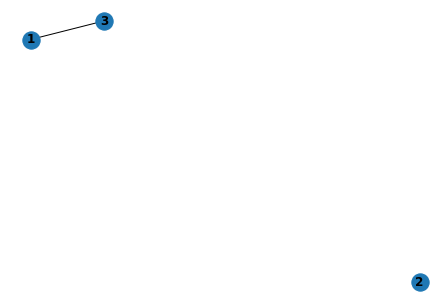

In [85]:
import matplotlib as plt
nx.draw(G, with_labels=True, font_weight='bold')

위 그래프 엣지를 추가한 그래프 네트워크를 뽑아보겠습니다. socar를 중심으로 노드 1,2 그리고 AIFFEL이 연결성이 있다면 어떤 시각화 그래프가 나타날까요?


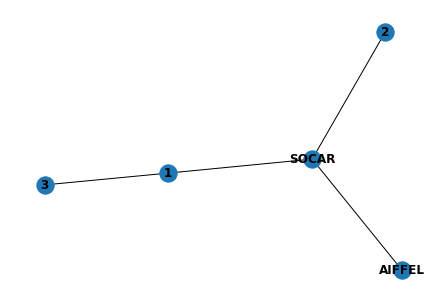

In [86]:
# 데이터 추가 후 시각화하기
G.add_edge('SOCAR', 2)  
G.add_edge(1, 'SOCAR')  
G.add_edge('SOCAR', 'AIFFEL')  
nx.draw(G, with_labels=True, font_weight='bold')

첫 번째 그래프에서는 노드 1과 3이 노드2와 떨어져있었지만, socar노드가 생기면서 노드 1,2,3간에 관계가 생성되었고, AIFFEL와 관계가 있다는 것을 확인할 수 있었습니다.

## 9-5. 보험 사기 적발을 위한 툴 (3) H3

이번 스텝에서 살펴볼 내용은 지역별, 이동량, 수요량을 시각화해 분석하기 유용한 도구인 H3을 소개합니다.

![content img](https://d3s0tskafalll9.cloudfront.net/media/original_images/earth.png)

## H3 : 그리드시스템이란?

___

그리드 시스템은 대용량 데이터를 분석하고, 지구의 영역을 구분 가능한 그리드 셀로 분할 할 때 중요합니다. 일반적으로 수직과 수평으로 면, 공간을 분할하는 것을 의미하며 공간 분석의 가장 시초입니다! 우리가 사는 지구는 둥근 구형체입니다. 이 때문에, 다각형을 사용하여 지구를 균등하게 나누는 것은 불가능하다고 볼 수 있습니다. 그래서 연구자들은 다양한 방법으로 이전 세대 그리드 시스템의 한계를 극복하는 새로운 시스템을 개발하고 있는데, H3은 우버에서 공개한 육각형의 그리드 시스템입니다. 한국 같은 경우 행정 구역 단위가 있지만 이 단위는 행정을 위한 단위이기 때문에 분석시 유용하지 않습니다.

### 그리드를 이용한 분석 사례

___

![content img](https://d3s0tskafalll9.cloudfront.net/media/images/H3_2.max-800x600.png)

\[실제 쏘카에서 사용하는 H3 분석\]

위 그림은 실제 쏘카에서 데이터 분석을 할 때 사용하는 사례입니다. 쏘카에서는 데이터 분석을 할 때, 크기 등이 제각각인 행정 단위 보다는 H3라는 균일한 지역 단위를 적극적으로 활용합니다.

H3 단위로 데이터를 집계하고, 수요를 예측해 적절한 차량을 공급하는 등 서비스 오퍼레이션의 기본 단위입니다. 지역별 수요량, 이동 데이터 등을 표현할 때 주로 사용합니다.

-   (참고) 서울의 위경도 - [틀:위치 지도 대한민국 서울](https://ko.wikipedia.org/wiki/%ED%8B%80:%EC%9C%84%EC%B9%98_%EC%A7%80%EB%8F%84_%EB%8C%80%ED%95%9C%EB%AF%BC%EA%B5%AD_%EC%84%9C%EC%9A%B8)

### 왜 육각형(헥사곤)을 사용했을까?

다음과 같은 특징을 가지고 있습니다.

1.  그라디언트에 대한 분석/스무딩을 단순화해 구현할 수 있다.
2.  중심점과 이웃 점 사이에 단 하나의 거리를 가지고 있다.
3.  Dynamic neighborhoods

육각형의 그리드 시스템의 가장 큰 장점은 인접하고 있는 셀로 이동할 때, 어떠한 방향과 각도로 이동하든 각 중심점까지의 거리가 동일하다는 점입니다. 아래 그림을 보면 사각형은 좌우상하와 대각선의 거리가 다른 것을 볼 수 있습니다.

![content img](https://d3s0tskafalll9.cloudfront.net/media/images/tri_sq.max-800x600.png)

\[출처 : https://www.youtube.com/watch?v=ay2uwtRO3QE\]

**재조합**

하지만 이는 감수할 수 있는 정도의 에러이며 헥사곤을 회전시키는 것을 통하여 어느정도 극복할 수 있는 부분이기도 합니다.

![content img](https://d3s0tskafalll9.cloudfront.net/media/images/sq_hexa.max-800x600.png)

\[출처 : https://www.youtube.com/watch?v=ay2uwtRO3QE\]

**Distortion(왜곡)**

헥사곤을 선택한 중요한 이유 중 하나인데요. 지구는 구체이고, 평평하지 않습니다. 그러나 grid는 평평하죠. map projection을 통해 평평해지게 됩니다.

![content img](https://d3s0tskafalll9.cloudfront.net/media/images/projec.max-800x600.png)

\[출처 : https://www.youtube.com/watch?v=ay2uwtRO3QE\]

이렇게 H3을 사용하면 지리 데이터를 분석해 여러 결정을 내릴 수가 있습니다.

H3 그리드는 122개의 기본 셀을 지구상에 배치하고 한 면에 10개의 셀을 배치해 구성할 수 있습니다. 또한, resolution 이라는 개념을 가지고 있어, 서로 다른 크기의 육각형으로 표현할 수 있습니다.

16개의 해상도를 지원하고, Resolution 7은 1.2km, 8은 0.4km 의 반경 크기를 지닙니다. Resolution에 따른 반경 크기는 아래 사이트를 참고하세요.

-   [Table of Cell Areas for H3 Resolutions](https://h3geo.org/docs/core-library/restable/)

![content img](https://d3s0tskafalll9.cloudfront.net/media/images/hexa_map.max-800x600.png)

\[출처 : https://www.youtube.com/watch?v=ay2uwtRO3QE\]

## 실습 내용

___

지금부터 아래의 내용을 차례대로 다뤄보겠습니다.

-   크기가 다른 H3 표현하기
-   이웃 H3 가져오기/ 이웃 H3 여부 판별하기
-   Children H3 가져오기
-   tooltip 추가하기

터미널을 통하여 필요한 라이브러리를 설치합니다.

```
$ pip install h3
$ pip install geopandas
$ pip install folium
```


In [87]:
from shapely.geometry import Point, Polygon 
import h3
import geopandas as gpd 
import folium 
import pandas as pd
import numpy as np

크기가 다른 H3 표현하기 남산과 강남의 좌표를 준비합니다. 좌표는 위도와 경도값을 함께 준비합니다.

In [88]:
# 남산의 좌표, 강남의 좌표를 준비합니다.
namsan_lat = 37.56421
namsan_lng = 127.0016

gangnam_lat = 37.50881
gangnam_lng = 127.04097

In [89]:
# 좌표를 H3 단위로 변환합니다. 
namsan_h3_r7 = h3.geo_to_h3(lat=namsan_lat, lng=namsan_lng, resolution=7 )
namsan_h3_r8 = h3.geo_to_h3(lat=namsan_lat, lng=namsan_lng, resolution=8 )
gangnam_h3_r7 = h3.geo_to_h3(lat=gangnam_lat, lng=gangnam_lng, resolution=7 )
gangnam_h3_r8 = h3.geo_to_h3(lat=gangnam_lat, lng=gangnam_lng, resolution=8 )

print( namsan_h3_r7, namsan_h3_r8, gangnam_h3_r7, gangnam_h3_r8 )

8730e1d88ffffff 8830e1d88bfffff 8730e1ca3ffffff 8830e1ca39fffff


지도상 표현하기 위한 폴리곤을 리턴해주는 함수를 만듭니다.


In [90]:
# 지도상 표현하기 위한 폴리곤을 리턴해주는 함수를 만듭니다. 
def make_polygon(k):  
    return Polygon(h3.h3_to_geo_boundary(k,geo_json=True))

H3을 input으로 넣으면 폴리곤을 돌려줍니다.

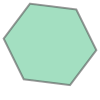

In [91]:
# H3 를 인풋으로 넣으면 폴리곤을 돌려줍니다.
make_polygon(namsan_h3_r7)

`seoul_example_h3`변수 안에 남산의 위도,경도좌표를 가지는 폴리곤의 resolution 7과 8을 선언하고, 강남의 위도, 경도좌표를 가지는 폴리곤의 resolution 7과 8의 리스트를 선언합니다. 폴리곤의 데이터 타입을 읽기 위한 `GeoDataFrame`을 선언합니다.

In [92]:
# 폴리곤 데이터 타입을 읽기 위한 GeoDataFrame를 선언합니다. 
seoul_example_h3 = [namsan_h3_r7, namsan_h3_r8, gangnam_h3_r7, gangnam_h3_r8]
df = gpd.GeoDataFrame( {'h3': seoul_example_h3 })
df['geometry'] = df['h3'].apply(make_polygon)
df.crs = {'init': 'epsg:4326'}

/opt/conda/lib/python3.9/site-packages/pyproj/crs/crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


남산의 resolution7의 폴리곤, 남산의 resolution8의 폴리곤, 강남의 resolution7, 강남의 resolution8의 GeoDataFrame을 만들었습니다.

In [93]:
df

,h3,geometry
0,8730e1d88ffffff,"POLYGON ((127.00862 37.55554, 127.00339 37.566..."
1,8830e1d88bfffff,"POLYGON ((127.00390 37.56184, 127.00339 37.566..."
2,8730e1ca3ffffff,"POLYGON ((127.05899 37.49930, 127.05377 37.509..."
3,8830e1ca39fffff,"POLYGON ((127.04638 37.50516, 127.04587 37.509..."


`Folium`은 위치 좌표계의 값을 지도 위에 시각화 할 수 있습니다. `folium.map`은 map클래스를 로드해서 범위를 지정해줍니다. location속성으로 주시하고자 하는 지도의 정중앙 좌표를 표시합니다. 현재 location속성으로 남산의 위도와 경도좌표를 집어넣었습니다. resolution에 따라 해당 지역을 더 자세히 볼수도 있고 넓게 볼 수도 있습니다. 확대해서 아래로 드레그하면 아래 위치하고 있는 두 폴리곤의 모습도 볼 수 있습니다.

In [94]:
# 맵에 데이터 프레임을 추가한 후 출력합니다. 
m = folium.Map([namsan_lat, namsan_lng])
folium.GeoJson(df).add_to(m)
m

### 이웃 H3 가져오기

이웃 h3을 가져오기 위해서는 `hex_ring`메소드를 활용하는데요. 강남 지역의 resolution 8의 인접지역을 뽑아보겠습니다. 쏘카에서는 인접지역의 수요를 분석하는 경우가 많은데, 해당 메소드를 사용합니다.

In [95]:
# 이웃 H3 를 가져오기 위해서는 hex_ring 메소드를 활용합니다. 
gangnam_h3_neighbor = list(h3.hex_ring(gangnam_h3_r8))
print( gangnam_h3_neighbor )

['8830e1ca3dfffff', '8830e1ca07fffff', '8830e1ca15fffff', '8830e1ca3bfffff', '8830e1ca03fffff', '8830e1ca31fffff']


In [96]:
# 데이터프레임을 생성해, 맵에 출력합니다. 
df = gpd.GeoDataFrame( {'h3': gangnam_h3_neighbor })
df['geometry'] = df['h3'].apply(make_polygon)
df.crs = {'init': 'epsg:4326'}

m = folium.Map([namsan_lat, namsan_lng])
folium.GeoJson(df).add_to(m)
m

# 6개의 이웃이 출력되었습니다.

/opt/conda/lib/python3.9/site-packages/pyproj/crs/crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


### Children H3 가져오기

한 지역을 좀 더 세밀하게 분석하고 싶을 때, resolution차이를 이용한 children h3을 통한 분석을 합니다.

In [97]:
# 이웃 H3 를 가져오기 위해서는 h3_to_children 메소드를 활용합니다. 
namsan_h3_children = list(h3.h3_to_children(namsan_h3_r7))
print( namsan_h3_children )

['8830e1d883fffff', '8830e1d885fffff', '8830e1d887fffff', '8830e1d88dfffff', '8830e1d881fffff', '8830e1d88bfffff', '8830e1d889fffff']


In [98]:
namsan_h3_children.append(namsan_h3_r7)

폴리곤이 그려질 위치를 `GeoDataFrame`을 생성합니다. 그리고 `folium.map`은 폴리곤이 처음 보여줄 위치에 대한 경도와 위도를 넣어야지만 생성이 되기 때문에, 경도와 위도를 넣고 맵을 출력해줍니다.


In [99]:
# 데이터프레임을 생성해, 맵에 출력합니다. 
df = gpd.GeoDataFrame( {'h3': namsan_h3_children })
df['geometry'] = df['h3'].apply(make_polygon)
df.crs = {'init': 'epsg:4326'}

m = folium.Map([namsan_lat, namsan_lng])
folium.GeoJson(df).add_to(m)
m

# namsan_h3_r7 와 Children h3 들이 함께 출력되는 것을 확인할 수 있습니다.

/opt/conda/lib/python3.9/site-packages/pyproj/crs/crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


### tooltip 추가하기

h3의 각종 화면을 표현할 수 없는 정보를 함께 보고 싶을 때, tooltip의 기능을 사용하여 분석합니다. 예를들면, tooltip을 이용해 수요나 공급 지난주 수요등 부가적인 정보를 함께 볼 수 있습니다. 지도를 출력했다면, h3 출력화면에 마우스를 가져다 대볼까요? 각 h3별 정보들이 출력되는 것을 볼 수 있습니다.

In [100]:
# H3 와 H3 갯수 만큼의 더미 데이터를 생성합니다 
namsan_h3_children = list(h3.h3_to_children(namsan_h3_r7))
dummy_demand = np.random.randint(0, len(namsan_h3_children), size=len(namsan_h3_children))*1000

In [101]:
# 데이터프레임을 생성합니다 
df = gpd.GeoDataFrame( {'h3': namsan_h3_children, 
                       'demand_cnt': dummy_demand})

df['geometry'] = df['h3'].apply(make_polygon)
df.crs = {'init': 'epsg:4326'}

df

/opt/conda/lib/python3.9/site-packages/pyproj/crs/crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


,h3,demand_cnt,geometry
0,8830e1d883fffff,2000,"POLYGON ((127.00862 37.55554, 127.00811 37.559..."
1,8830e1d885fffff,4000,"POLYGON ((126.99755 37.54836, 126.99703 37.552..."
2,8830e1d887fffff,2000,"POLYGON ((127.00544 37.54880, 127.00493 37.553..."
3,8830e1d88dfffff,3000,"POLYGON ((126.99282 37.55466, 126.99231 37.559..."
4,8830e1d881fffff,1000,"POLYGON ((127.00072 37.55510, 127.00021 37.559..."
5,8830e1d88bfffff,4000,"POLYGON ((127.00390 37.56184, 127.00339 37.566..."
6,8830e1d889fffff,4000,"POLYGON ((126.99600 37.56139, 126.99549 37.565..."


h3출력화면에 마우스를 가져다 대볼까요? 각 h3 필드별 수요양, 각 h3정보들이 보입니다.

In [102]:
m = folium.Map([namsan_lat, namsan_lng], zoom_start=12)

tootip = folium.GeoJsonTooltip(fields=['demand_cnt', 'h3'])
folium.GeoJson(df, tooltip = tootip).add_to(m)

m

# 아래와 같이 H3 별 정보를 담은 툴팁이 생겼습니다.

지금까지 실제 쏘카데이터를 다뤄보기 위한 기본적인 툴들에 대해 공부해보았는데요. 다음 스텝부터는 우리가 배운 툴을 사용하여 실제 쏘카데이터들을 분석해보는 시간을 가져보겠습니다.

## 9-6. 쏘카 메모 데이터에서 전화번호 추출하기

## 메모에서 문자열 추출하기

사고 메모 데이터라 하면, 사고 처리과정에서 콜 센터의 도움을 받아 진행하게 되는데, 해당 과정에서 남는 사고 경위, 상황에 대한 메모 데이터입니다. 예시로 상담 메모로부터 전화번호를 추출하고, 추출하는 이유는 반복적으로 사고를 일으키는 사람을 추적하기 위한 목적도 있습니다. 추출 후에는 사고 건 별로 연루된 사람들이, 과거에 어떤 사고를 얼마나 누적으로 일으켰었는지 피쳐로 활용하기 위한 목적입니다. 이 데이터는 프로젝트에서 피쳐로 활용 됩니다.

기존 학습한 정규표현식을 활용해 에서 배운 정규표현식를 활용해 불규칙해보이는 메모 속에서 필요한 정보를 추출해봅시다.

In [103]:
import pandas as pd 
import re
import os

In [104]:
# 예시 데이터 로드 
df = pd.read_csv(os.getenv('HOME')+'/aiffel/insurance_fraud/data/ch3_regex_sample_v2.csv')
df.head(30)

,accident_id,memo
0,1,- 운전자 : 본인\n- 사고장소 : 화곡3동\n- 사고경위 : 좌회전신호 받고 차...
1,2,- 운전자 : 본인 \n- 사고장소 : 12:54 \n- 사고경위 : 인천공항 주차...
2,3,- 운전자 : 본인\n- 사고장소 : 17:20 홍제3동\n- 사고경위 : 주차된 ...
3,4,- 대차정보 : 김그린 010-0000-0003 / 동승자-배우자 기블루 \n#대인...
4,5,- 운전자 : 본인 (동승자 1인)\n- 사고장소 : 삼방동\n- 사고경위 : 자차...
5,6,- 운전자 : 김소나 (동승자 미지정/준회원) 010-0000-0009\n- 사고...
6,7,- 운전자 : 본인 (동승자 없음)\n- 사고장소 : 장소 기억안 남 -일반도로 0...
7,8,- 운전자 : 김레드(0100000000)\n- 사고장소 : 사하구\n- 사고경위 ...
8,9,- 운전자 : 김블랙 \n- 사고장소 : \n- 사고경위 : 19:50경 제부도 앞...
9,10,- 운전자 : 최레드\n- 사고장소 : 경기도 화성시 반월동\n- 사고경위 : 17...


In [105]:
# 사고 일시, 사고 경위 등이 담겨있는 메모입니다. 
df.memo[0]

'- 운전자 : 본인\n- 사고장소 : 화곡3동\n- 사고경위 : 좌회전신호 받고 차선변경중 다른차량과 접촉\n- 파손부위 : 자차 왼쪽 범퍼,타이어쪽 / 상대방 조수석 범퍼 \n- 대차 접수번호 : \n- 대인/대차정보 : \n- 보험 : 010-0001-0000\n- 현장 출동 : 010-0002-0000 안전하게 마무리 \n- 처리내용 : 사진요청중 / 현출O / 평일기준 2-3일내 연락 / 블박 확인요청'

In [106]:
df.memo[1]

'- 운전자 : 본인 \n- 사고장소 : 12:54 \n- 사고경위 : 인천공항 주차장에서 상대차가 접촉\n- 파손부위 : 운전석 휀다 / 대차 앞범퍼 \n- 대인/대차정보 : 김쏘카 010-0000-0013\n- 처리내용 : 운행가능/면책금, 휴차료, 보상 제외 품목 추가비용 발생/평일기준 2-3일내 연락 \n- 010-0000-0007 (김삼삼) 연락와서 쌍방과실이라고 주장.'

### 파손부위 정보 출력하기

파손 부위 정보가 담긴 메모만을 출력해보겠습니다.


In [107]:
# 아래와 같이 출력됩니다. 
for idx, row in df.iterrows():
    for sentence in row['memo'].split('\n'):
        if '부위' in sentence:
            print(idx, sentence)

0 - 파손부위 : 자차 왼쪽 범퍼,타이어쪽 / 상대방 조수석 범퍼 
1 - 파손부위 : 운전석 휀다 / 대차 앞범퍼 
2 - 파손부위 : 자차 앞범퍼 / 상대차 뒷문,뒷범퍼
4 - 파손부위 : 자차 조수석쪽 뒷 후미등 밑 긁힘 / 대차 조수석쪽 뒷 후미등 밑 긁힘
5 - 파손부위 : 보조석쪽 앞범퍼 안개등부분 긁힘 / 범퍼 손상 / 조수석 앞 타이어 옆부분 찢어짐
6 - 파손부위 : 핸들 오른쪽으로 틀어짐 /조수석쪽 앞바퀴 휠 긁힘
7 - 파손부위 : 앞범퍼, 좌측 전조등, 본넷, 좌측 앞펜더
8 - 파손부위 : 우측 뒷펜더
9 - 파손부위 : 뒷 범퍼
10 - 파손부위 : 뒷 범퍼
11 - 파손부위 : 뒷 범퍼
12 - 파손부위 : 앞 범퍼
13 - 파손부위 : 좌측 앞, 뒷도어
22 - 접촉부위 (운행가능) - 누수여부(X)
23 - 파손부위 : 운전석 휀다
24 - 파손부위 : 자차 앞범퍼 / 상대차 뒷문,뒷범퍼
25 - 파손부위 : 자차 조수석쪽 뒷 후미등 밑 긁힘 / 대차 조수석쪽 뒷 후미등 밑 긁힘
26 - 파손부위 : 자차 조수석쪽 뒷 후미등 밑 긁힘 / 대차 조수석쪽 뒷 후미등 밑 긁힘
27 - 파손부위 : 범퍼 경미 손상
28 - 파손부위 : 핸들 오른쪽으로 틀어짐 /조수석쪽 앞바퀴 휠 긁힘
29 - 파손부위 : 앞범퍼, 좌측 전조등, 본넷, 좌측 앞펜더
30 - 파손부위 : 범퍼 경미 손상 
31 - 파손부위 : 운전석 휀다 / 대차 앞범퍼 
32 - 파손부위 : 앞범퍼, 좌측 전조등, 본넷, 좌측 앞펜더
33 - 파손부위 : 앞범퍼
34 - 파손부위 : 앞범퍼, 좌측 전조등
35 - 파손부위 : 자차 조수석쪽 뒷 후미등 밑 긁힘 / 대차 조수석쪽 뒷 후미등 밑 긁힘


### '00000000000' 형태 가져오기

-   \[\]는 자체는 하나의 문자를 가리킵니다. 0-9 사이의 문자를 의미합니다.
-   {}는 앞의 문자의 갯수를 뜻합니다.

In [108]:
# 아래와 같이 출력됩니다. 
for idx, row in df.iterrows():
    print( idx, re.findall('[0-9]{11}', row['memo'] ) )

0 []
1 []
2 []
3 []
4 []
5 []
6 []
7 []
8 []
9 []
10 []
11 []
12 []
13 []
14 []
15 []
16 []
17 []
18 []
19 []
20 ['01000000011', '01000000019', '01000000020', '01000000021']
21 []
22 []
23 []
24 ['01000000026', '01000000027']
25 []
26 []
27 []
28 ['01000000031', '01000000032']
29 ['01000000033', '01000000034', '01000000035']
30 []
31 []
32 ['01000000050', '01000000034', '01000000035']
33 ['01000000070', '01000000071']
34 ['01000000072', '01000000073']
35 ['01000000009']


### '000-0000-0000', '00000000000' 형태 가져오기

전화번호 형태의 문자열은 '-'을 포함할 수도 안할 수도 있습니다. 그럴 땐 '?' 표현식을 활용합니다.


In [109]:
# 아래와 같이 출력됩니다. 
for idx, row in df.iterrows():
    print( idx, re.findall('[0-9]{3}-?[0-9]{4}-?[0-9]{4}', row['memo'] ) )

0 ['010-0001-0000', '010-0002-0000']
1 ['010-0000-0013', '010-0000-0007']
2 ['010-0001-0000']
3 ['010-0000-0003']
4 ['010-0000-0098']
5 ['010-0000-0009', '010-0001-0000']
6 []
7 []
8 []
9 []
10 []
11 ['010-0002-0000']
12 ['010-0001-0000']
13 []
14 ['010-0000-0007']
15 []
16 ['010-0000-0008', '010-0000-0004', '010-0000-0010', '010-0002-0000']
17 ['010-0000-0011', '010-0000-0012', '010-0000-0013']
18 ['010-0000-0014', '010-0000-0015', '010-0000-0016']
19 ['010-0001-0000']
20 ['01000000011', '01000000019', '01000000020', '01000000021']
21 ['010-0000-0022', '010-0002-0000']
22 ['010-0000-0011', '010-0000-0013', '010-0001-0000']
23 ['010-0000-0025']
24 ['01000000026', '01000000027']
25 ['010-0000-0028']
26 ['010-0001-0000', '010-0000-0029']
27 ['010-0000-0030']
28 ['010-0002-0000', '01000000031', '01000000032']
29 ['01000000033', '01000000034', '01000000035']
30 []
31 ['010-0000-0009', '010-0000-0007']
32 ['01000000050', '01000000034', '01000000035']
33 ['01000000070', '01000000071']
34 ['0

### 최다 빈출 문자열 찾기

앞의 학습에서 문자열을 추출하는 방법들을 공부해보았는데요. 이번에는 최다 빈출 문자열을 찾아보겠습니다. 최다 빈출 단어를 출력하는 이유는 어떠한 이유로 이 문자열들이 다양하게 등장했는지 알아보기 위해 문자열을 추출하는 과정을 거치게됩니다.

In [110]:
# 우선 문자열을 순회하면서 담을 리스트를 선언합니다. 
result = []

In [111]:
# 아래처럼 순회합니다. 
for idx, row in df.iterrows():
    # 원하는 패턴의 문자열을 찾았다면 result 에 추가합니다. 
    for target_string in re.findall('[0-9]{3}-?[0-9]{4}-?[0-9]{4}', row['memo'] ) : 
        # '-' 는 제거하여 추가합니다. 
        result.append(target_string.replace('-', ''))

In [112]:
# 결과를 확인합니다. 
print(result)

['01000010000', '01000020000', '01000000013', '01000000007', '01000010000', '01000000003', '01000000098', '01000000009', '01000010000', '01000020000', '01000010000', '01000000007', '01000000008', '01000000004', '01000000010', '01000020000', '01000000011', '01000000012', '01000000013', '01000000014', '01000000015', '01000000016', '01000010000', '01000000011', '01000000019', '01000000020', '01000000021', '01000000022', '01000020000', '01000000011', '01000000013', '01000010000', '01000000025', '01000000026', '01000000027', '01000000028', '01000010000', '01000000029', '01000000030', '01000020000', '01000000031', '01000000032', '01000000033', '01000000034', '01000000035', '01000000009', '01000000007', '01000000050', '01000000034', '01000000035', '01000000070', '01000000071', '01000000072', '01000000073', '01000000050', '01000000009']


In [113]:
# 가장 많이 빈출된 값을 카운트해봅시다. 
from collections import Counter

target_str_counter = Counter(result)
print(target_str_counter)

Counter({'01000010000': 7, '01000020000': 5, '01000000013': 3, '01000000007': 3, '01000000009': 3, '01000000011': 3, '01000000034': 2, '01000000035': 2, '01000000050': 2, '01000000003': 1, '01000000098': 1, '01000000008': 1, '01000000004': 1, '01000000010': 1, '01000000012': 1, '01000000014': 1, '01000000015': 1, '01000000016': 1, '01000000019': 1, '01000000020': 1, '01000000021': 1, '01000000022': 1, '01000000025': 1, '01000000026': 1, '01000000027': 1, '01000000028': 1, '01000000029': 1, '01000000030': 1, '01000000031': 1, '01000000032': 1, '01000000033': 1, '01000000070': 1, '01000000071': 1, '01000000072': 1, '01000000073': 1})


In [114]:
# 최빈값 가져오기 - most_common 메소드를 활용해 상위 K 개의 빈출 스트링을 가져옵니다. 
print(target_str_counter.most_common(5))

[('01000010000', 7), ('01000020000', 5), ('01000000013', 3), ('01000000007', 3), ('01000000009', 3)]


In [115]:
# 어떤 이유로 다양하게 등장했는지 알아보기 위해, 해당 문자열이 포함된 메모를 추출해보겠습니다.  
for idx, row in df.iterrows():
    for sentence in row['memo'].split('\n'):
        
        target_string = re.findall('[0-9]{3}-?[0-9]{4}-?[0-9]{4}', sentence )
        if '010-0001-0000' in target_string: 
            print(sentence)
        
        
#         if '010-0002-0000' in target_string: 
#             print(sentence)

- 보험 : 010-0001-0000
- 보험 담당자 : 010-0001-0000
- 보험 담당 : 010-0001-0000
- 보험 담당 직원 : 010-0001-0000
- 보험 담당 : 010-0001-0000
- 보험사 연락처 : 010-0001-0000
- 보험 담당 연락처 : 010-0001-0000


위에 결과를 통해 최다 빈출 단어를 출력해 보면 결국 보험사 직원들 혹은 현장에 출동한 기사님들 (현출 기사) 번호인 것을 확인 할 수 있습니다. 해당 부분은 나중에 사고자 네트워크를 그릴 때 방해가 되는 정보이므로 다음 스텝에서 제거하겠습니다.

## 9-7. NetworkX로 쏘카 사고 네트워크 시각화하기

이번에는 실제 쏘카에서 사용하는 데이터로 사고 네트워크를 시각화해보고 분석해보겠습니다. 데이터셋 안에는 운전자 번호, 사고장소, 사고경위, 파손부위, 대인&대차정보, 처리내용등의 내용들이 담겨있습니다. 이 정보들 중 필요한 내용들만 추출해서 시각화해서 실제 사고가 연관된 정도가 그래프로 어떻게 표현되는지 시각화해봅시다.

터미널을 통하여 아래 패키지를 설치해 봅시다!

```
$ pip install pyvis
```

In [116]:
import pandas as pd 
import re
import networkx as nx 
from pyvis.network import Network 
from itertools import combinations

In [117]:
df = pd.read_csv(os.getenv('HOME')+'/aiffel/insurance_fraud/data/ch3_regex_sample_v2.csv')
df.head()

,accident_id,memo
0,1,- 운전자 : 본인\n- 사고장소 : 화곡3동\n- 사고경위 : 좌회전신호 받고 차...
1,2,- 운전자 : 본인 \n- 사고장소 : 12:54 \n- 사고경위 : 인천공항 주차...
2,3,- 운전자 : 본인\n- 사고장소 : 17:20 홍제3동\n- 사고경위 : 주차된 ...
3,4,- 대차정보 : 김그린 010-0000-0003 / 동승자-배우자 기블루 \n#대인...
4,5,- 운전자 : 본인 (동승자 1인)\n- 사고장소 : 삼방동\n- 사고경위 : 자차...


### 전화번호 추출


In [118]:
re.findall('[0-9]{3}-?[0-9]{4}-?[0-9]{4}', df.memo[1])

['010-0000-0013', '010-0000-0007']

이전 학습에서 최대 빈출 문자열을 뽑아보고, 최대 빈출 문자열이 보험사나 현장 출동과 관련됨을 알았습니다. 여기서는 문장 단위로 검사를 해서 '보험', '현장' 등이 포함된 문장은 전화번호 추출에서 제거하도록 하겠습니다. 즉, 노이즈가 되는 문장 및 번호들을 제거하겠습니다.

In [119]:
# memo 에서 문자열을 찾는 함수를 작성합니다 
def find_number(memo):
    result = []
    for sentence in memo.split('\n'): 
        
        if '보험' in sentence or '현장' in sentence: # 보험 직원, 현장 출동 기사의 정보는 제외합니다. 
            continue 
        else:
            extracted_numbers = re.findall('[0-9]{3}-?[0-9]{4}-?[0-9]{4}', sentence)
            extracted_numbers = list(map( lambda x: x.replace('-', ''), extracted_numbers))
            result.append(extracted_numbers[0]) if len(extracted_numbers)>0 else ''
    
    return result 

df['number_involved'] = df['memo'].apply(lambda x: find_number(x))

In [120]:
df.head(20)

,accident_id,memo,number_involved
0,1,- 운전자 : 본인\n- 사고장소 : 화곡3동\n- 사고경위 : 좌회전신호 받고 차...,[]
1,2,- 운전자 : 본인 \n- 사고장소 : 12:54 \n- 사고경위 : 인천공항 주차...,"[01000000013, 01000000007]"
2,3,- 운전자 : 본인\n- 사고장소 : 17:20 홍제3동\n- 사고경위 : 주차된 ...,[]
3,4,- 대차정보 : 김그린 010-0000-0003 / 동승자-배우자 기블루 \n#대인...,[01000000003]
4,5,- 운전자 : 본인 (동승자 1인)\n- 사고장소 : 삼방동\n- 사고경위 : 자차...,[01000000098]
5,6,- 운전자 : 김소나 (동승자 미지정/준회원) 010-0000-0009\n- 사고...,[01000000009]
6,7,- 운전자 : 본인 (동승자 없음)\n- 사고장소 : 장소 기억안 남 -일반도로 0...,[]
7,8,- 운전자 : 김레드(0100000000)\n- 사고장소 : 사하구\n- 사고경위 ...,[]
8,9,- 운전자 : 김블랙 \n- 사고장소 : \n- 사고경위 : 19:50경 제부도 앞...,[]
9,10,- 운전자 : 최레드\n- 사고장소 : 경기도 화성시 반월동\n- 사고경위 : 17...,[]


### 전화번호 조합 만들기

-   보험사기 문제정의에 따르면 보험사기는 반복적 / 조직적으로 이루어지는 특성을 지닙니다.
-   같은 사고에 연루된 두 사람의 관계를 표현하기 위해 데이터를 전처리해보겠습니다.
-   사람이 노드가 되고, 두 사람이 같은 사고에 연결되어 있다면 두 사람은 엣지(관계)를 갖는다고 할 수 있습니다.


In [121]:
# combination 을 이용하여 번호들의 조합을 만듭니다. 
def make_combination(involved_number):
    return list(combinations(involved_number,2))

df['number_combinations'] = df['number_involved'].apply(lambda x: make_combination(x))

In [122]:
df.tail()

,accident_id,memo,number_involved,number_combinations
31,32,- 운전자 : 본인 \n- 사고장소 : 12:54 \n- 사고경위 : 인천공항 주차...,"[01000000009, 01000000007]","[(01000000009, 01000000007)]"
32,33,- 운전자 : 김용산(01000000050)\n- 사고장소 : 용산구\n- 사고경위...,"[01000000050, 01000000034, 01000000035]","[(01000000050, 01000000034), (01000000050, 010..."
33,34,- 운전자 : 김용산(01000000070)\n- 사고장소 : 용인 \n- 사고경위...,"[01000000070, 01000000071]","[(01000000070, 01000000071)]"
34,35,- 운전자 : 김용산(01000000072)\n- 사고장소 : 용산구\n- 사고경위...,"[01000000072, 01000000073]","[(01000000072, 01000000073)]"
35,36,- 운전자 : 본인 (동승자 1인)\n- 사고장소 : 삼방동\n- 사고경위 : 자차...,"[01000000050, 01000000009]","[(01000000050, 01000000009)]"


### 네트워크 그리기 위한 형태로 만들기

-   p1, p2, weight 의 형태를 가진 데이터로 재구성해보겠습니다.
-   p 는 번호를 뜻하고, weight 은 사고에 엮인 횟수를 의미합니다.

In [123]:
# list 에 pair 를 담습니다. 
numbers_pair = []
for idx, row in df.iterrows(): 
    for comb in row['number_combinations']: 
        numbers_pair.append( list(comb) )

print(numbers_pair[:10])

[['01000000013', '01000000007'], ['01000000008', '01000000004'], ['01000000008', '01000000010'], ['01000000004', '01000000010'], ['01000000011', '01000000012'], ['01000000011', '01000000013'], ['01000000012', '01000000013'], ['01000000014', '01000000015'], ['01000000014', '01000000016'], ['01000000015', '01000000016']]


In [124]:
# dataframe 을 생성합니다. 
network_df = pd.DataFrame(numbers_pair, columns=['p1', 'p2'])
network_df['freq'] = 1
network_df.head()

,p1,p2,freq
0,01000000013,01000000007,1
1,01000000008,01000000004,1
2,01000000008,01000000010,1
3,01000000004,01000000010,1
4,01000000011,01000000012,1


In [125]:
# 2회 연루된 사람에게는 weight 을 더 크게 줍니다. 
network_df = network_df.groupby(by=['p1','p2'], as_index=False).sum('Weight').sort_values(by='freq', ascending=False )
network_df.head()

,p1,p2,freq
5,01000000011,01000000013,2
21,01000000034,01000000035,2
0,01000000004,01000000010,1
14,01000000019,01000000020,1
25,01000000070,01000000071,1


### 시각화 하기

2~3명이 독립적으로 발생한 사고는 우연한 사고로 볼 수 있지만, 서로 네트워크가 엮여있는 건들도 존재합니다. 사고는 우연의 영역에 가깝기 때문에 엮여있는 사람들은 보험사기로 의심해 볼 수 있습니다. 출력화면에서 노드를 꾹 누르고 드래그해보세요. 엮여있는 노드들은 붙어있고, 엮여있지 않은 노드는 떨어지는 것을 볼 수 있습니다. 노드 하나는 사람이고, 사고가 나면 엮인게 선으로 표현됩니다. 화면에서 굵은 선은 2번이나 연류된 관계입니다. 예를 들면, 50번은 accident id기준 33번이랑 36번이랑 연관되어있습니다.

In [126]:
g = Network(notebook=True)

for index, row in network_df.iterrows(): 
    g.add_node(row['p1'])
    g.add_node(row['p2'])
    g.add_edge(row['p1'], row['p2'], value=row['freq'], title='freq')

In [127]:
from IPython.core.display import display, HTML

g.show('result.html')
display(HTML('result.html'))

## 9.8 H3 라이브러리로 쏘카 주행 데이터 시각화하기

이전 챕터에서는 네트워크 시각화를 통해서 보험사기 사고의 특징을 뽑아보았습니다. 이번 챕터에서는 실제 주행 데이터를 기반으로 보험사기 사고의 특징을 추출해보겠습니다. 이렇게 추출한 특성은 다음 노드에서의 보험사기 예측의 피쳐로 쓰이게 됩니다. 실제 주행데이터를 기반으로 보험사기사고의 특징을 추출하기 위해서는 id와 위도, 경도 그리고 사기여부로 구성된 데이터셋을 이용해 주행 데이터의 패턴을 파악해보겠습니다.


In [128]:
# 우선 데이터셋을 임포트해봅시다. 
# 어떤 칼럼으로 이루어져있는지 확인해봅시다. id / 시각 / 위경도 / 사기 여부로 이루어져있습니다. 
import pandas as pd 
import folium

gps_df = pd.read_csv(os.getenv('HOME')+'/aiffel/insurance_fraud/data/ch3_gps_sample_v2.csv')
gps_df

,id,lng,lat,is_fraud
0,1010149,126.981566,35.058931,True
1,1010149,126.979396,35.056668,True
2,1010149,126.979395,35.056666,True
3,1010149,126.979395,35.056666,True
4,1010149,126.979397,35.056664,True
...,...,...,...,...
2996,1038215,127.334879,37.351526,False
2997,1038215,127.329981,37.340787,False
2998,1038215,127.326308,37.339377,False
2999,1038215,127.325225,37.338941,False


In [129]:
# 사기건과 비사기건의 id 는 다음과 같습니다. 
fraud_list = [1033662, 1023332, 1018336, 1010149]
normal_list = [1037358, 1039563, 1038666, 1038215]

In [130]:
# 시각화하기 위한 함수를 작성합니다. 
def visualize(df, id): 
    print(id)
    df = df[df['id']==id]
    coord_list = list(zip(df.lat, df.lng ))
    
    folium_map = folium.Map( location=coord_list[0], zoom_start=11 )

    for coord in coord_list:
        folium.CircleMarker( location=[ coord[0], coord[1] ], fill_color='#43d9de', radius=7  ).add_to( folium_map )

    return folium_map

### 시각화 결과

아래는 주행 데이터를 시각화한 결과입니다. 어떤 차이를 볼 수 있을까요? 일반 건의 주행데이터는 특정한 목적지를 가지고 이동하는 특성을 보입니다. 반면 보험사기건의 주행데이터는 특정 지역을 반복적으로 뺑뺑 주행하는 특성을 확인할 수 있습니다. 이러한 특성은 보험 사기를 위해, 해당 지역을 탐색하는 연습 패턴이라 볼 수 있습니다. 전체 경로 패턴을 확인하기 위해 지도를 축소해서 확인해봅시다.


### 일반 사고 건 시각화

In [131]:
visualize(gps_df, normal_list[0] )

1037358


In [132]:
visualize(gps_df, normal_list[1] )

1039563


In [133]:
visualize(gps_df, normal_list[2] )

1038666


In [134]:
visualize(gps_df, normal_list[3] )

1038215


### 보험사기 건 시각화

In [135]:
visualize(gps_df, fraud_list[0] )

1033662


In [136]:
visualize(gps_df, fraud_list[1] )

1023332


In [137]:
visualize(gps_df, fraud_list[2] )

1018336


In [138]:
visualize(gps_df, fraud_list[3] )

1010149


### 피쳐 엔지니어링
예측 피쳐로 사용하기 위해 accident id단위로 좌표 데이터를 집계해보겠습니다. 이때, 앞에서 배운 h3 라이브러리를 활용해 보겠습니다.


In [139]:
import h3

In [140]:
gps_df

,id,lng,lat,is_fraud
0,1010149,126.981566,35.058931,True
1,1010149,126.979396,35.056668,True
2,1010149,126.979395,35.056666,True
3,1010149,126.979395,35.056666,True
4,1010149,126.979397,35.056664,True
...,...,...,...,...
2996,1038215,127.334879,37.351526,False
2997,1038215,127.329981,37.340787,False
2998,1038215,127.326308,37.339377,False
2999,1038215,127.325225,37.338941,False


In [141]:
# 각 좌표의 h3 를 추출합니다. 

for index, row in gps_df.iterrows(): 
    gps_df.loc[index,'h3'] = h3.geo_to_h3(lat=row['lat'], lng=row['lng'], resolution=7 )

In [142]:
# 각 사고에서 특정 h3 의 횟수를 구하기 위한 집계를 수행해보겠습니다 

gps_df_prep = gps_df.groupby(['is_fraud', 'id', 'h3'], as_index=False).count()[['is_fraud', 'id', 'h3','lat']]
gps_df_prep = gps_df_prep.rename(columns = {'lat': 'gps_count'})
gps_df_prep

,is_fraud,id,h3,gps_count
0,False,1037358,8730e142dffffff,2
1,False,1037358,8730e144dffffff,1
2,False,1037358,8730e1463ffffff,2
3,False,1037358,8730e1466ffffff,1
4,False,1037358,8730e146affffff,1
...,...,...,...,...
323,True,1033662,8730c1925ffffff,2
324,True,1033662,8730c1926ffffff,3
325,True,1033662,8730c1931ffffff,14
326,True,1033662,8730c1935ffffff,1


In [143]:
# gpss count 가 해당 사고 주행에서 차지하는 비중을 찾아보겠습니다. 

gps_df_prep['total_gps_count_by_id'] = gps_df_prep.groupby(by=['id'])['gps_count'].transform(sum)
gps_df_prep['h3_share'] = gps_df_prep['gps_count']/gps_df_prep['total_gps_count_by_id']

gps_df_prep

,is_fraud,id,h3,gps_count,total_gps_count_by_id,h3_share
0,False,1037358,8730e142dffffff,2,810,0.002469
1,False,1037358,8730e144dffffff,1,810,0.001235
2,False,1037358,8730e1463ffffff,2,810,0.002469
3,False,1037358,8730e1466ffffff,1,810,0.001235
4,False,1037358,8730e146affffff,1,810,0.001235
...,...,...,...,...,...,...
323,True,1033662,8730c1925ffffff,2,265,0.007547
324,True,1033662,8730c1926ffffff,3,265,0.011321
325,True,1033662,8730c1931ffffff,14,265,0.052830
326,True,1033662,8730c1935ffffff,1,265,0.003774


In [144]:
# 각 사고 id 에서 차지하는 비중이 높은 h3 에 순서를 매깁니다. 
gps_df_prep['h3_rank'] = gps_df_prep.groupby('id')['h3_share'].rank(method='first', ascending=False)
gps_df_prep = gps_df_prep.sort_values(by=['id', 'h3_rank'])
gps_df_prep

,is_fraud,id,h3,gps_count,total_gps_count_by_id,h3_share,h3_rank
263,True,1010149,8730c6adeffffff,300,713,0.420757,1.0
257,True,1010149,8730c6ad2ffffff,71,713,0.099579,2.0
245,True,1010149,8730c632cffffff,66,713,0.092567,3.0
233,True,1010149,8730c622cffffff,33,713,0.046283,4.0
232,True,1010149,8730c6228ffffff,32,713,0.044881,5.0
...,...,...,...,...,...,...,...
216,False,1039563,8730e0b81ffffff,1,159,0.006289,32.0
219,False,1039563,8730e0b8dffffff,1,159,0.006289,33.0
225,False,1039563,8730e0bb3ffffff,1,159,0.006289,34.0
226,False,1039563,8730e1d94ffffff,1,159,0.006289,35.0


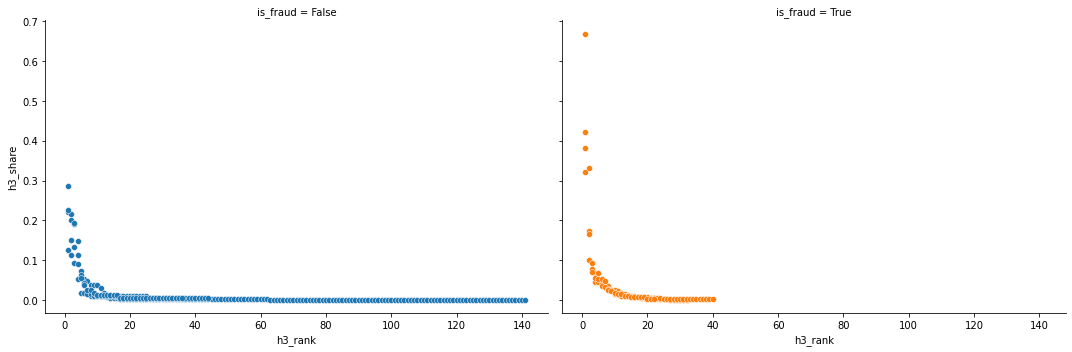

In [145]:
import seaborn as sns 
g = sns.FacetGrid(gps_df_prep, col="is_fraud", hue="is_fraud",  height=5, aspect=1.5)
g.map(sns.scatterplot, "h3_rank", "h3_share")

### 결론

___

위 시각화 결과에서 왼쪽 그래프는 일반 사고건을 그래프 한 것이고, 오른쪽 그래프는 보험 사기건 시각화한 것입니다.

x축은 h3이고, y축은 해당 h3이 전체 주행에서 차지하는 비율을 나타냅니다.

`일반(정상) 사고건`은 여러 H3 에 걸쳐 운행합니다. 그리고 상위 H3의 주행 비율이 0.1 ~ 0.3 사이에 분포하는 것을 알 수 있습니다.

`반면 보험사기 주행건`은 일반 건 대비 적은 수의 H3 을 운행하며, 상위 H3 주행 비율이 0.3 ~ 0.7 에 달합니다.

이 수치의 의미는 보험사기일 경우 특정 지역에서 반복적으로 주행한 비율이 높다는 뜻입니다. 이를 통해 보험 사기 건 주행의 특성을 시각화하고 수치적으로 확인해보았습니다. 이는 보험사기를 예측하는 `주요한 피쳐`로 사용됩니다.

## 9-9. 마무리하며

지금까지 보험사기를 예측하기 위해 필요한 정규표현식, NetworkX, H3 도구들에 대해서 공부해보았습니다.

이 과정은 우리가 평소에 사용하지 않았던 도구들을 실제 데이터를 활용해 실습까지 진행해보았는데요. 이런 데이터들이 보험 사기를 예측하는 데 얼마나 효율적으로 쓰이고 있는지, 다음 프로젝트에서 확인할 수 있습니다.

앞으로 우리가 추출해 낸 메모 데이터, 주행 데이터 그리고 GPS 위치정보를 토대로 프로젝트 노드에서 모델의 피쳐로 들어가는 중요한 과정입니다.

메모 데이터는 사고 경위, 상황에 대한 메모데이터로, 반복적으로 사고를 일으키는 사람을 추적하기 위해 필요한 정보들이 담겨있습니다. 과거에 어떤 사고를 얼마나 누적으로 일으켰는지 확인하기 위해 메모데이터에서 정규표현식을 사용해 필요한 정보, 피쳐들을 뽑아냈습니다.

반복적으로 사고를 일으키는 사건에는 가중치를 부여해, 사건 간의 관계들을 시각화시키기도 했었고, 실제 주행 데이터를 기반으로 각 위·경도별로 보험 사기 사고의 특징을 뽑아내 보았습니다.

프로젝트 노드에서는 이 데이터들을 피쳐로 활용해 모델을 학습해서, 실제 보험 사기 예측을 해보도록 하겠습니다!

In [146]:
pip list

Package                       Version
----------------------------- ------------------
absl-py                       0.12.0
aiohttp                       3.8.1
aiosignal                     1.2.0
albumentations                1.1.0
antlr4-python3-runtime        4.8
anyio                         3.4.0
appdirs                       1.4.4
argon2-cffi                   21.1.0
astunparse                    1.6.3
async-generator               1.10
async-timeout                 4.0.1
attrs                         21.2.0
audioread                     2.1.9
backcall                      0.2.0
backports.functools-lru-cache 1.6.4
beautifulsoup4                4.6.0
black                         21.12b0
bleach                        4.1.0
branca                        0.4.2
brotlipy                      0.7.0
cachetools                    4.2.4
certifi                       2021.10.8
cffi                          1.15.0
chardet                       3.0.4
charset-normalizer            2.0.8
clang 

Note: you may need to restart the kernel to use updated packages.
